In [3]:
import re, string,os
from glob import glob as gb
import pandas as pd
from tqdm import tqdm
from collections import Counter
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from functions import *

base_path = "/home/ruben/Documents/GitHub/ParlaMintCase"

plotting.style_(n_var=12,pal='Paired')

In [4]:
tf = pd.read_csv(base_path + '/resources/keywords-expertise-translation.csv')
tf_science = {language:dict(zip(tf[tf['language'] == language]['word'],tf[tf['language'] == language]['translation'])) for language in list(set(tf['language']))}
tf_science = {k:{x:i for x,i in v.items() if x not in ["policy","program","measures","knowledge","information"]} for k,v in tf_science.items()}
tf_science.update({"gb":{k:k for k,v in tf_science['nl'].items()}})

In [5]:
def ttr(text):
    tokens = len(text.split(' '))
    types = len(set(text.split(' ')))

    nttr = (types / tokens) / tokens
    return nttr

In [81]:
def plot_(language):
    data = data_loader.period(language=language,data_version="lemmatized",start_date="2019-06",end_date="2020-06")
    data = data[data["text"].str.len() >= 500]
    data['date'] = [utils.find_date(x) for x in data['id']]
    data = data.dropna().reset_index(drop=True)
    data['l'] = ["science" if any(n in t for n in tf_science[language].values()) == True else "other" for t in data['text']]
    print(f'found {language} hits')
    data['ttr'] = [ttr(x) for x in data['text']]

    data_science = data[data['l'] == "science"].sort_values('date').reset_index(drop=True)

    fig = plt.figure(figsize=(20,5))
    avgs = data_science[['date','ttr']].groupby('date').mean().reset_index().sort_values('date').reset_index(drop=True)

    plt.plot(avgs['date'],avgs['ttr'],c='salmon',linewidth=2)
    sns.stripplot(data=data_science,x='date',y='ttr',jitter=0.3,color='teal',alpha=.1)

    # for label in ax.get_xticklabels():
    #     label.set_rotation(45) 
    plt.locator_params(nbins=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.ylim(0,avgs['ttr'].max() + 0.001)
    plt.savefig(base_path + f"/results/plots/typetokenratio-expertise-{language}.png",bbox_inches='tight',dpi=350)
    plt.show()

looking for data in  /media/ruben/Elements/ParlaMint/gb/gb-ana-txt/
found 242 files
found gb hits


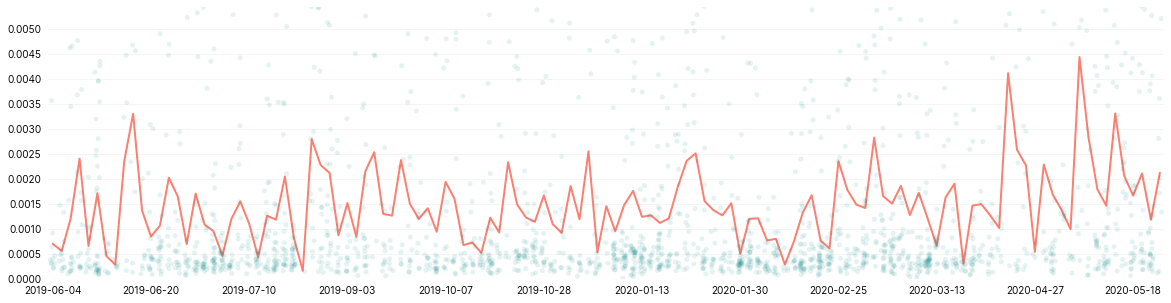

looking for data in  /media/ruben/Elements/ParlaMint/nl/nl-ana-txt/
found 796 files
found nl hits


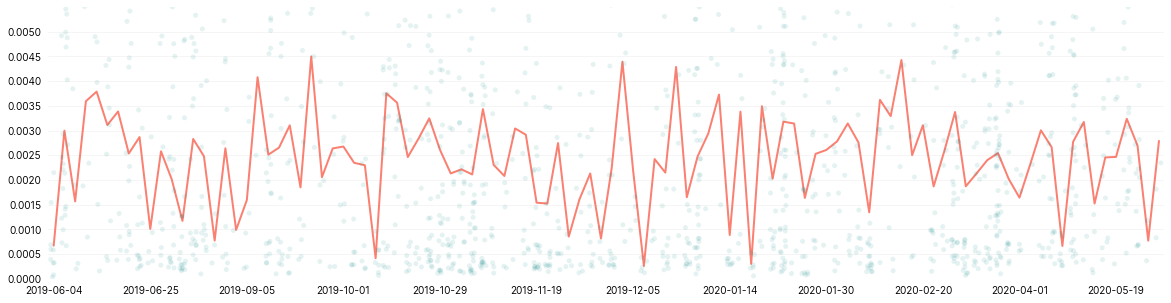

looking for data in  /media/ruben/Elements/ParlaMint/it/it-ana-txt/
found 107 files
found it hits


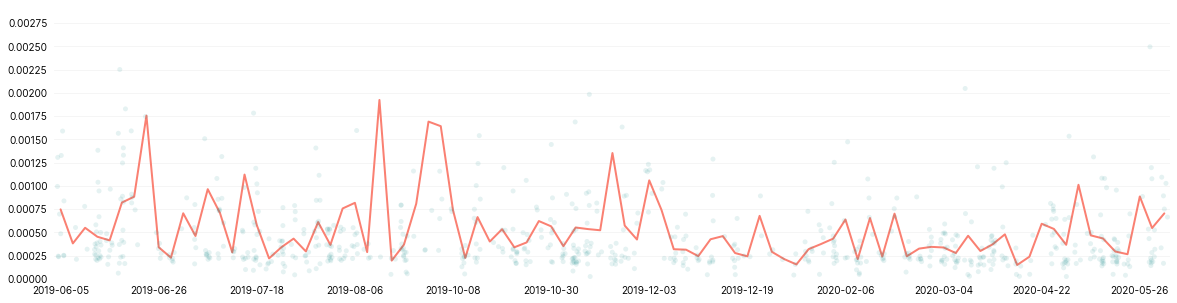

looking for data in  /media/ruben/Elements/ParlaMint/es/es-ana-txt/
found 30 files
found es hits


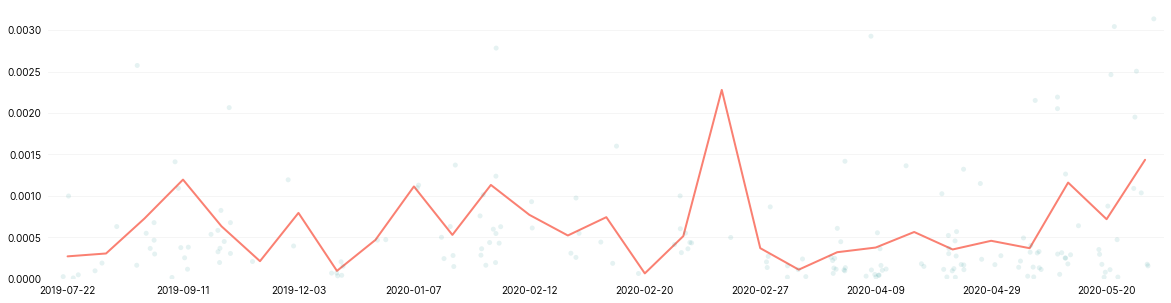

looking for data in  /media/ruben/Elements/ParlaMint/pl/pl-ana-txt/
found 84 files
found pl hits


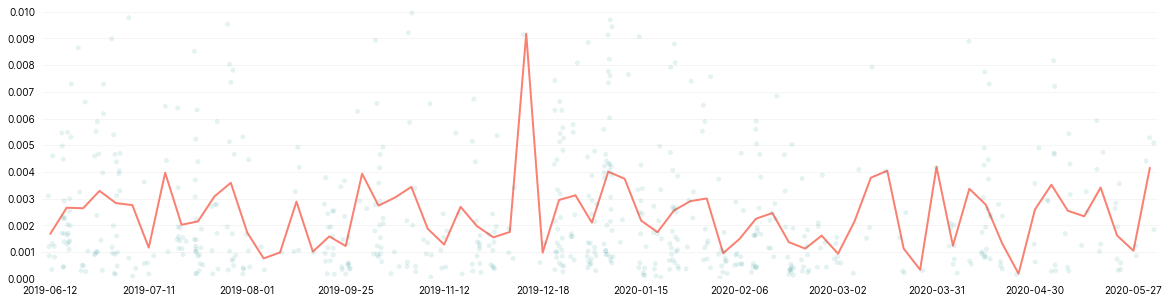

In [82]:
for l in "gb nl it es pl".split(' '):
    plot_(l)